#Making Dataset Sparse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("../Datasets/aegypti.csv")

In [3]:
data.head()

,VECTOR,OCCURRENCE_ID,SOURCE_TYPE,LOCATION_TYPE,POLYGON_ADMIN,Y,X,YEAR,COUNTRY,COUNTRY_ID,GAUL_AD0,STATUS
0,Aedes aegypti,1,unpublished,polygon,2,25.49,-80.99,1960.0,United States of America,USA,259,NaN
1,Aedes aegypti,2,unpublished,polygon,2,26.12,-81.33,1960.0,United States of America,USA,259,NaN
2,Aedes aegypti,3,unpublished,polygon,2,26.13,-97.55,1960.0,United States of America,USA,259,NaN
3,Aedes aegypti,4,unpublished,polygon,2,26.15,-80.49,1960.0,United States of America,USA,259,NaN
4,Aedes aegypti,5,unpublished,polygon,2,26.40,-98.19,1960.0,United States of America,USA,259,NaN


In [4]:
brazil_data = data[data['COUNTRY'] == 'Brazil']
brazil_data.reset_index(drop=True, inplace=True)

In [5]:
df = brazil_data.loc[:, ['Y','X','LOCATION_TYPE']]
df['presence'] = 1

In [6]:
sparsity_fraction = 0.7
np.random.seed(42)
df_clone = df.copy()



In [7]:

mask =  np.random.rand(df.shape[0]) < sparsity_fraction

In [8]:
for i in mask[:5]:
    print(str(i))

True
False
False
True
True


In [9]:
str_mask = [str(i) for i in mask]

In [10]:
df_clone['PRES'] = str_mask

In [11]:
def map_presence(val):
    if val == 'True':
        return np.nan
    elif val == 'False':
        return 1

In [12]:
df_clone

,Y,X,LOCATION_TYPE,presence,PRES
0,-32.21,-52.38,polygon,1,True
1,-31.56,-52.31,polygon,1,False
2,-30.80,-55.63,polygon,1,False
3,-30.37,-51.32,polygon,1,True
4,-30.34,-54.37,polygon,1,True
...,...,...,...,...,...
5052,-2.41,-48.15,point,1,True
5053,-2.58,-51.91,point,1,True
5054,2.41,-60.86,point,1,True
5055,-0.16,-50.38,point,1,True


In [13]:
df_clone['presence'] = df_clone['PRES'].apply(map_presence)


In [14]:
df_clone['presence'].isnull().sum()

np.int64(3572)

In [15]:
df_clone

,Y,X,LOCATION_TYPE,presence,PRES
0,-32.21,-52.38,polygon,NaN,True
1,-31.56,-52.31,polygon,1.0,False
2,-30.80,-55.63,polygon,1.0,False
3,-30.37,-51.32,polygon,NaN,True
4,-30.34,-54.37,polygon,NaN,True
...,...,...,...,...,...
5052,-2.41,-48.15,point,NaN,True
5053,-2.58,-51.91,point,NaN,True
5054,2.41,-60.86,point,NaN,True
5055,-0.16,-50.38,point,NaN,True


In [16]:
df_clone.shape

(5057, 5)

In [17]:
presence_data = df_clone[df_clone['presence'].notna()]
presence_data.reset_index(drop=True, inplace=True)

nodata = df_clone[df_clone['presence'].isnull()]
nodata.reset_index(drop=True, inplace=True)


In [18]:
presence_data["value"] = 1


C:\Users\dzaik\AppData\Local\Temp\ipykernel_17600\4116136674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presence_data["value"] = 1


In [19]:
presence_data.head(10)

,Y,X,LOCATION_TYPE,presence,PRES,value
0,-31.56,-52.31,polygon,1.0,False,1
1,-30.80,-55.63,polygon,1.0,False,1
2,-30.17,-51.44,polygon,1.0,False,1
3,-30.03,-50.23,polygon,1.0,False,1
4,-29.92,-51.10,polygon,1.0,False,1
5,-29.92,-51.18,polygon,1.0,False,1
6,-29.08,-51.04,polygon,1.0,False,1
7,-28.49,-54.28,polygon,1.0,False,1
8,-28.49,-52.29,polygon,1.0,False,1
9,-28.46,-52.81,polygon,1.0,False,1


In [20]:
nodata.head(10)

,Y,X,LOCATION_TYPE,presence,PRES
0,-32.21,-52.38,polygon,NaN,True
1,-30.37,-51.32,polygon,NaN,True
2,-30.34,-54.37,polygon,NaN,True
3,-30.29,-56.16,polygon,NaN,True
4,-30.21,-50.87,polygon,NaN,True
5,-30.10,-51.16,polygon,NaN,True
6,-30.00,-51.06,polygon,NaN,True
7,-29.89,-50.96,polygon,NaN,True
8,-29.80,-56.74,polygon,NaN,True
9,-29.74,-51.14,polygon,NaN,True


In [21]:
import seaborn as sns

In [22]:
nodata.shape

(3572, 5)

In [23]:
presence_data.shape

(1485, 6)

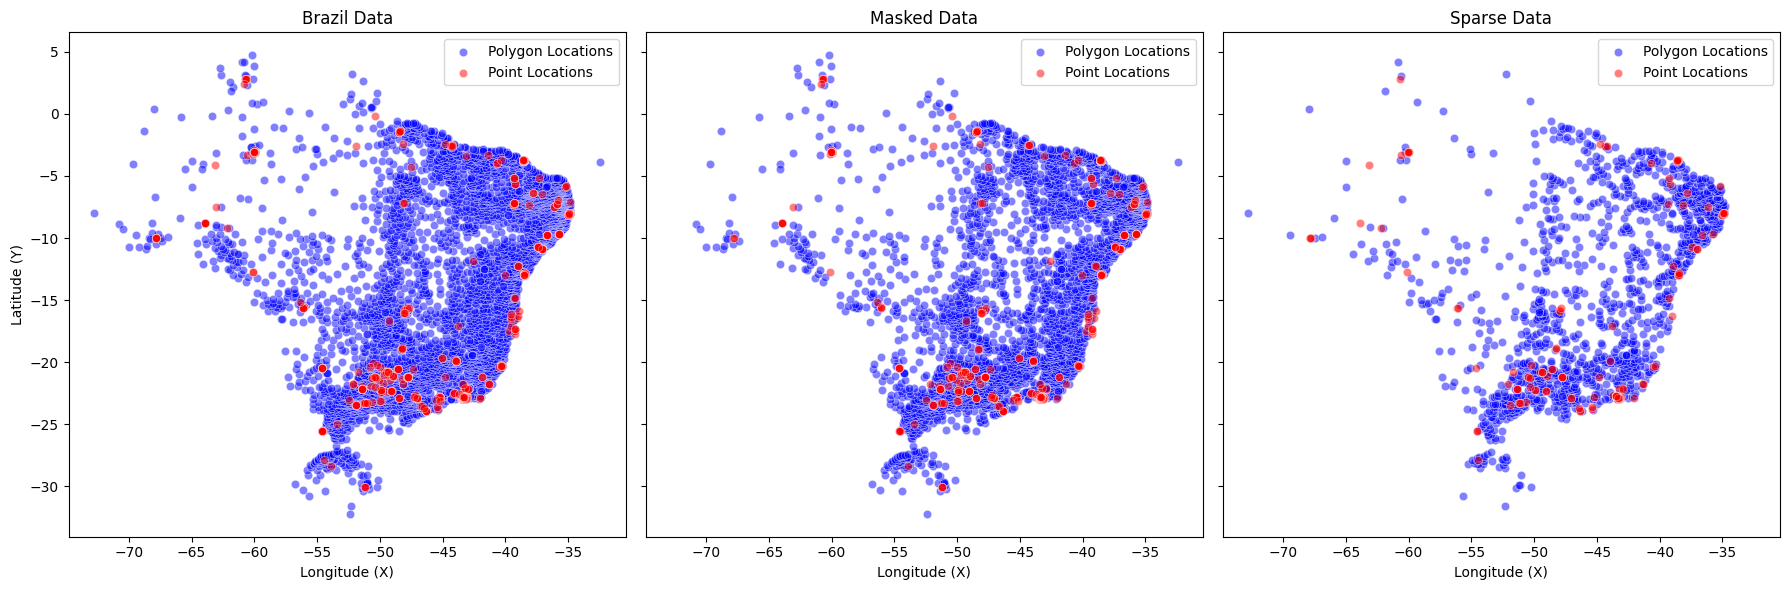

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)


polygon_data = df[df["LOCATION_TYPE"] == "polygon"]
point_data = df[df["LOCATION_TYPE"] == "point"]
sns.scatterplot(ax=axes[0], x=polygon_data["X"], y=polygon_data["Y"], color="blue", alpha=0.5, label="Polygon Locations")
sns.scatterplot(ax=axes[0], x=point_data["X"], y=point_data["Y"], color="red", alpha=0.5, label="Point Locations")
axes[0].set_title("Brazil Data")
axes[0].set_xlabel("Longitude (X)")
axes[0].set_ylabel("Latitude (Y)")


polygon_data = nodata[nodata["LOCATION_TYPE"] == "polygon"]
point_data = nodata[nodata["LOCATION_TYPE"] == "point"]
sns.scatterplot(ax=axes[1], x=polygon_data["X"], y=polygon_data["Y"], color="blue", alpha=0.5, label="Polygon Locations")
sns.scatterplot(ax=axes[1], x=point_data["X"], y=point_data["Y"], color="red", alpha=0.5, label="Point Locations")
axes[1].set_title("Masked Data")
axes[1].set_xlabel("Longitude (X)")


polygon_data = presence_data[presence_data["LOCATION_TYPE"] == "polygon"]
point_data = presence_data[presence_data["LOCATION_TYPE"] == "point"]
sns.scatterplot(ax=axes[2], x=polygon_data["X"], y=polygon_data["Y"], color="blue", alpha=0.5, label="Polygon Locations")
sns.scatterplot(ax=axes[2], x=point_data["X"], y=point_data["Y"], color="red", alpha=0.5, label="Point Locations")
axes[2].set_title("Sparse Data")
axes[2].set_xlabel("Longitude (X)")


plt.tight_layout()
plt.show()
